In [39]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

train_df=pd.read_csv("train.csv")
test_df=pd.read_csv('test.csv')
full_data=[train_df,test_df]

In [53]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
train_df["Pclass"].value_counts()
Pclass_sur=train_df[["Survived","Pclass"]].groupby('Pclass',as_index=False).mean()

#FE Regaring "Pclass"

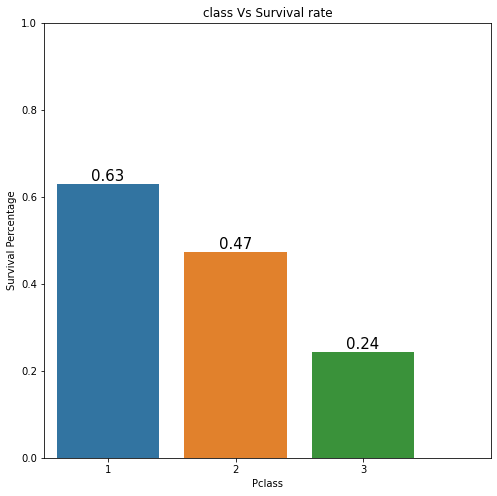

In [51]:


train_df["Pclass"].value_counts()
Pclass_sur=train_df[["Survived","Pclass"]].groupby('Pclass',as_index=False).mean()

plt.figure(figsize=(8,8))
plot=(sns.barplot(x="Pclass",y="Survived",data=Pclass_sur))
plt.title("class Vs Survival rate")

plt.xlabel("Pclass")

plt.ylabel("Survival Percentage")
plt.xlim([-0.5,3])
plt.ylim([0,1])

for bar in plot.patches:
                plot.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),textcoords='offset points')

In [59]:
train_df["Name"].sample(10)
#By Analysing the name column ,We can infer that the title part(e.g: Mr,Master,Miss etc.) is having a decent effect on "survival rate"
#We have to extract the title from the names 

785                   Harmer, Mr. Abraham (David Lishin)
85     Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...
496                       Eustis, Miss. Elizabeth Mussey
183                            Becker, Master. Richard F
91                            Andreasson, Mr. Paul Edvin
847                                   Markoff, Mr. Marin
843                           Lemberopolous, Mr. Peter L
797                                     Osman, Mrs. Mara
218                                Bazzani, Miss. Albina
81                           Sheerlinck, Mr. Jan Baptist
Name: Name, dtype: object

In [4]:
#train_df.drop("Survived",axis=1,inplace=True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,train
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,train
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,train
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,train


In [15]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Source       891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [5]:
titan_df=pd.concat([train_df,test_df])
titan_df.reset_index(drop=True)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test


In [13]:
titan_df["Cabin"].unique
titan_df[titan_df["Fare"]==titan_df.Fare.max()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,train
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,train
737,738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,train
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,test


In [5]:
titan_df.drop(['Cabin','Ticket','Name'],axis=1,inplace=True)
age_mean=titan_df.Age.mean()
titan_df["Age"].fillna(age_mean,inplace=True)
titan_df.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Source'],
      dtype='object')

In [6]:
dum_feat=['Pclass', 'Sex', 'SibSp', 'Parch',
       'Embarked']
titan_df_dum=pd.get_dummies(titan_df,columns=['Pclass', 'Sex', 'SibSp', 'Parch',
       'Embarked'],drop_first=True)
titan_df_dum.columns

Index(['PassengerId', 'Age', 'Fare', 'Source', 'Pclass_2', 'Pclass_3',
       'Sex_male', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5',
       'SibSp_8', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6', 'Parch_9', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [7]:
train_f=titan_df_dum[titan_df_dum["Source"]=="train"]
test_f=titan_df_dum[titan_df_dum["Source"]=="test"]
test_f.drop("Source",axis=1,inplace=True)

In [9]:

median_fare=test_f["Fare"].median()
test_f.fillna(median_fare,inplace=True)


train_f.drop("Source",axis=1,inplace=True)

In [10]:
from sklearn.ensemble import RandomForestClassifier
rand_clf=RandomForestClassifier(n_estimators=10)
clf=rand_clf.fit(train_f,y)

In [11]:
pred_y=clf.predict(test_f)

In [12]:
Final=pd.DataFrame()
Final["PassengerId"]=test_f.PassengerId
Final["Predicted"]=pred_y

Final

,PassengerId,Predicted
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
